In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000700733"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000700733
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,NATIONAL PENN BANCSHARES INC
Ticker,NPBC


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,34.0,8.987353e+00,2.026384e+00,7.230000e+00,7.715000e+00,7.99,10.75,1.417000e+01
interest income,44.0,8.406684e+07,1.593563e+07,5.693700e+07,7.247150e+07,79636000.00,94398750.00,1.207170e+08
net income,44.0,7.815955e+06,4.784101e+07,-2.812000e+08,1.451175e+07,17793500.00,24864500.00,2.885000e+07
net interest income,44.0,5.743711e+07,1.219037e+07,3.680500e+07,4.015725e+07,63344500.00,66362500.00,6.868200e+07
provision for loan losses,44.0,7.490818e+06,1.288974e+07,-2.500000e+06,9.875000e+05,1518500.00,4569000.00,5.200000e+07


# Plots

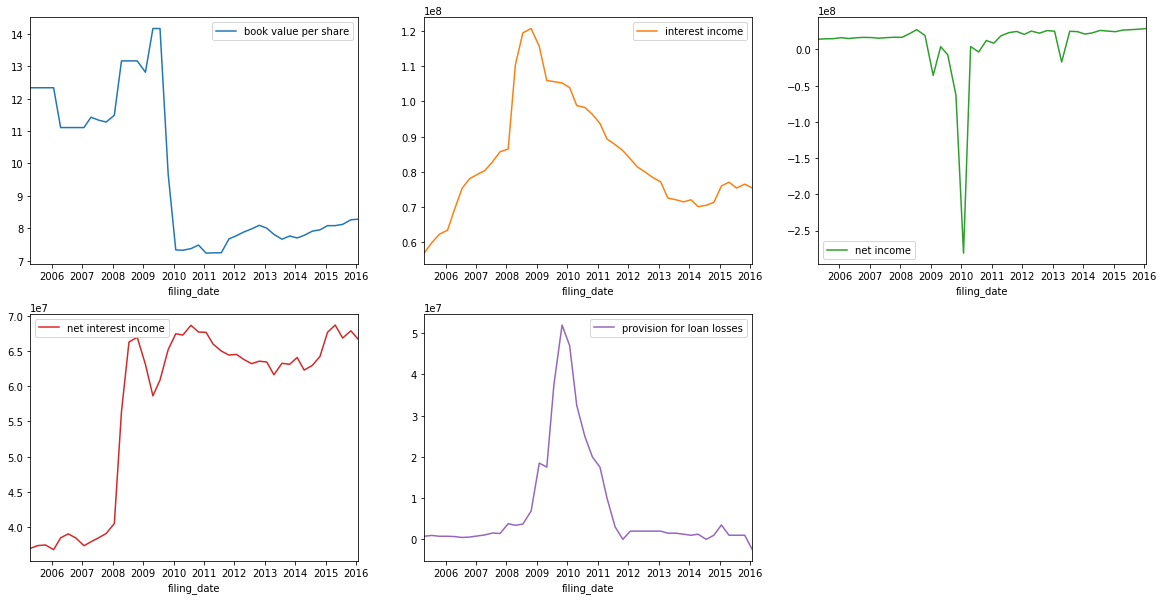

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                         
0000700733 book value per share  2005Q2 to 2005Q4: 3 periods  missing   
           book value per share  2006Q2 to 2006Q4: 3 periods  missing   
           book value per share  2008Q2 to 2008Q3: 2 periods  missing   
           book value per share                       2009Q2  missing   
           book value per share                       2011Q2  missing   
           total revenue                                None    empty   

                                            message  
cik        item                                      
0000700733 book value per share      Missing period  
           book value per share      Missing period  
           book value per share      Missing period  
           book value per share      Missing period  
           book value per share      Missing period  
           total revenue         No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()